In [18]:
!pip install scikit-learn-intelex

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.8/87.8 kB 3.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.1/26.1 MB 44.6 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 300.3/300.3 MB 11.0 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.0/4.0 MB 51.8 MB/s eta 0:00:0000:0100:01


In [1]:
# from sklearnex import patch_sklearn 
# patch_sklearn()
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
import matplotlib.cm as cm

%load_ext autoreload
%autoreload 2

In [13]:
from include.Framingham_data import *
from include.Fire_data import *
fhc = Framingham(verbose=True, oversample=True)
fire = Fire(verbose=True, oversample=True)

<class 'include.Framingham_data.Framingham'>
doing scaling
scaling ['diaBP', 'age', 'totChol', 'glucose', 'cigsPerDay', 'heartRate', 'BMI', 'sysBP']
split: Train:  2893 2893 Test:  1240 1240
after resample
split: Train:  4926 4926 Test:  1240 1240
loading ../data/algerian_fire/data_combined.csv
Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes'],
      dtype='object')
<class 'include.Fire_data.Fire'>
doing scaling
scaling ['year', 'day', 'RH', 'FFMC', 'Temperature', 'BUI', 'FWI', 'Rain', 'DMC', 'ISI', 'Ws', 'DC']
split: Train:  170 170 Test:  74 74
after resample
split: Train:  202 202 Test:  74 74


In [14]:
def elbow_analysis(seed, X, max_clusters = 15):
    k_rng = range(1,max_clusters)
    sse_scaler  = []
    for k in k_rng:
        km = KMeans(n_clusters=k)
        km.fit(X)
        sse_scaler.append(km.inertia_)
    #plot
    plt.plot(k_rng,sse_scaler)
    plt.xlabel("k")
    plt.ylabel("Sum of squared error")
    plt.show()
    
    
def silhouette_analysis2(n_clusters, seed, X):
    labels = KMeans(n_clusters=n_clusters, init="k-means++", random_state=seed).fit(X).labels_
    print(n_clusters, " = ", silhouette_score(X, labels, metric='euclidean'))
def silhouette_analysis3(n_clusters, seed, X):
    labels = KMeans(n_clusters=n_clusters, random_state=seed).fit(X).labels_
    print(n_clusters, " = ", silhouette_score(X, labels, metric='euclidean'))
def silhouette_analysis(n_clusters, seed, X):
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])
    
    clusterer = KMeans(n_clusters=n_clusters, random_state=seed)
    cluster_labels = clusterer.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels, metric='euclidean')
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )
    
    sample_silhouette_values = silhouette_samples(X, cluster_labels)
    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples
    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    plt.show()

In [15]:
print("fhc")
for i in range(2, 16):
    silhouette_analysis3(i, 42, fhc.X_train)

print("fire")
for i in range(2, 16):
    silhouette_analysis3(i, 42, fire.X_train)

fhc
2  =  0.19673922478121436
3  =  0.1981418777414985
4  =  0.14897694804513545
5  =  0.13184858056119
6  =  0.1283448739052902
7  =  0.12443319577585998
8  =  0.12417062334556149
9  =  0.12360939723483177
10  =  0.12164810202999736
11  =  0.12164359563303719
12  =  0.12340332834945321
13  =  0.12427815427981447
14  =  0.11985859207490443
15  =  0.11746201573825985
fire
2  =  0.29221593535288537
3  =  0.20940941326346152
4  =  0.21383430543798504
5  =  0.19275487491990434
6  =  0.19663845195537777
7  =  0.20507692651510862
8  =  0.20196340898973686
9  =  0.21055461020782076
10  =  0.2043300620732456
11  =  0.20312661897511347
12  =  0.2215848139641178
13  =  0.23636194361297685
14  =  0.2179772491706309
15  =  0.23784443692207435


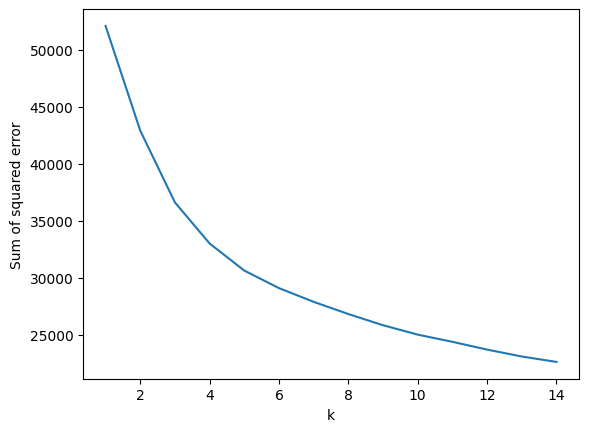

In [16]:
elbow_analysis(seed=42, X=fhc.X_train)

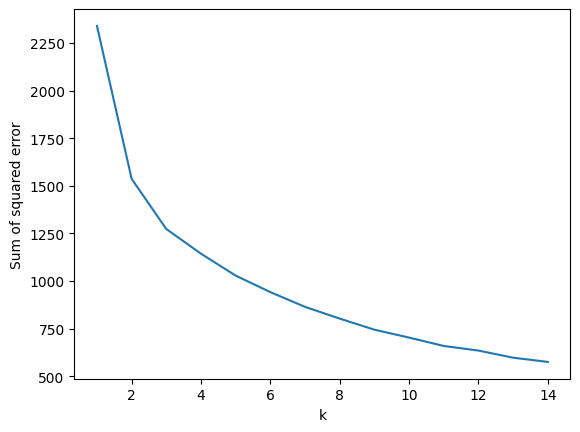

In [17]:
elbow_analysis(seed=42, X=fire.X_train)

For n_clusters = 2 The average silhouette_score is : 0.19673922478121436


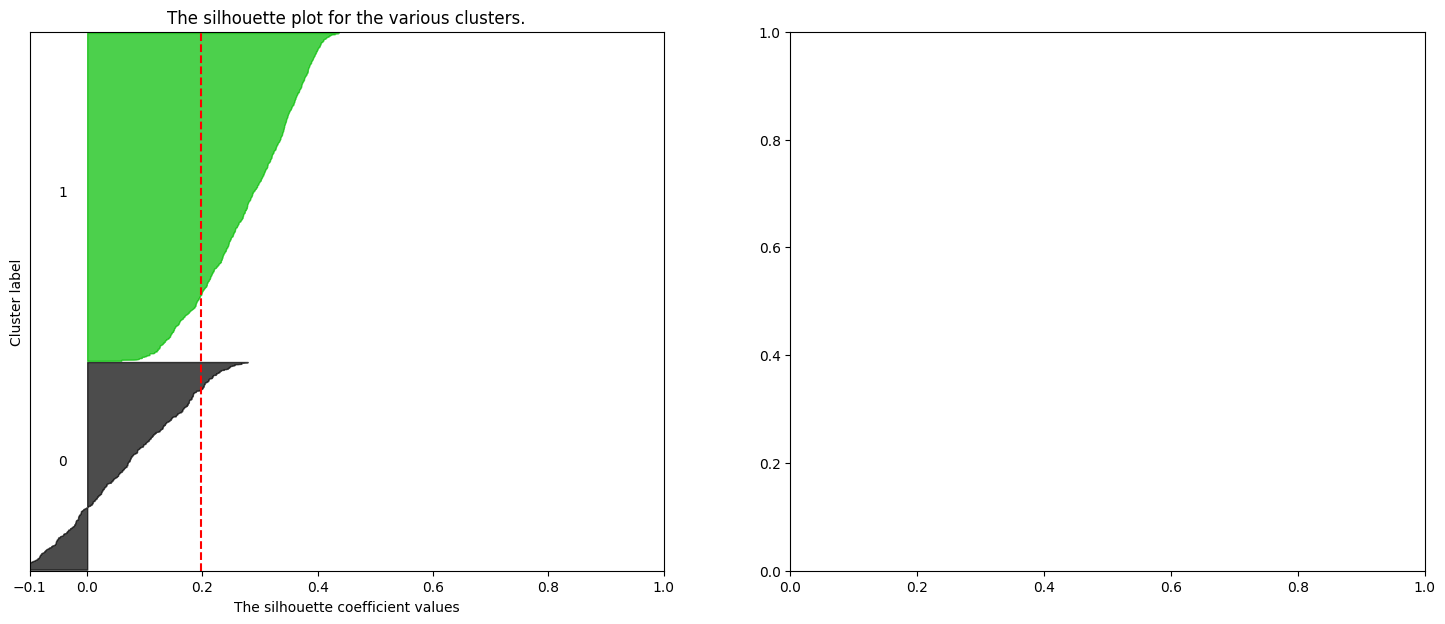

For n_clusters = 3 The average silhouette_score is : 0.1981418777414985


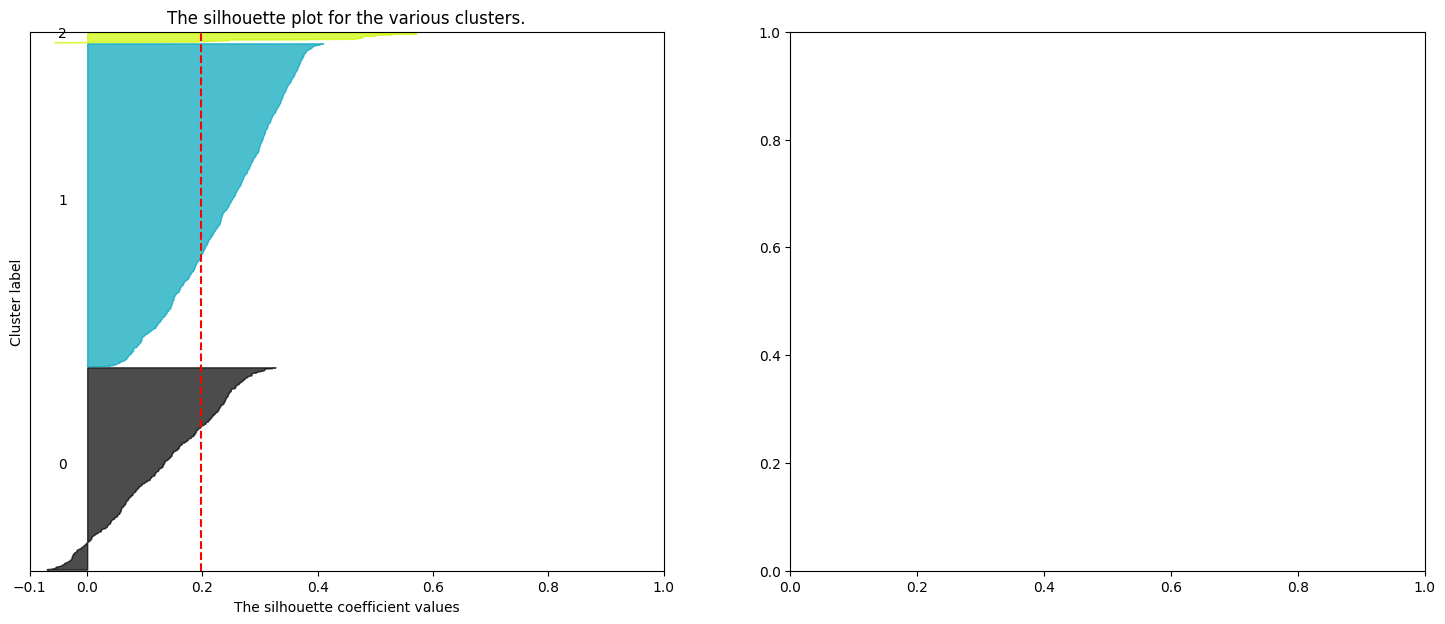

For n_clusters = 4 The average silhouette_score is : 0.14897694804513545


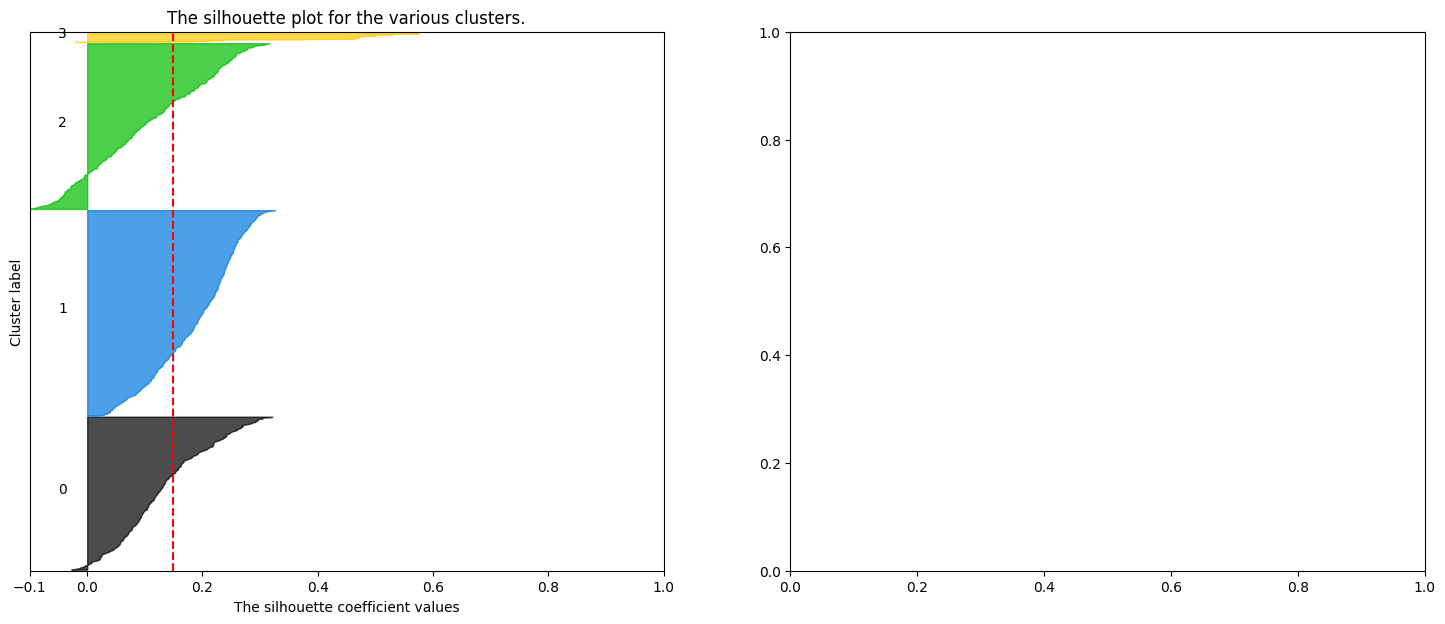

For n_clusters = 5 The average silhouette_score is : 0.13184858056119


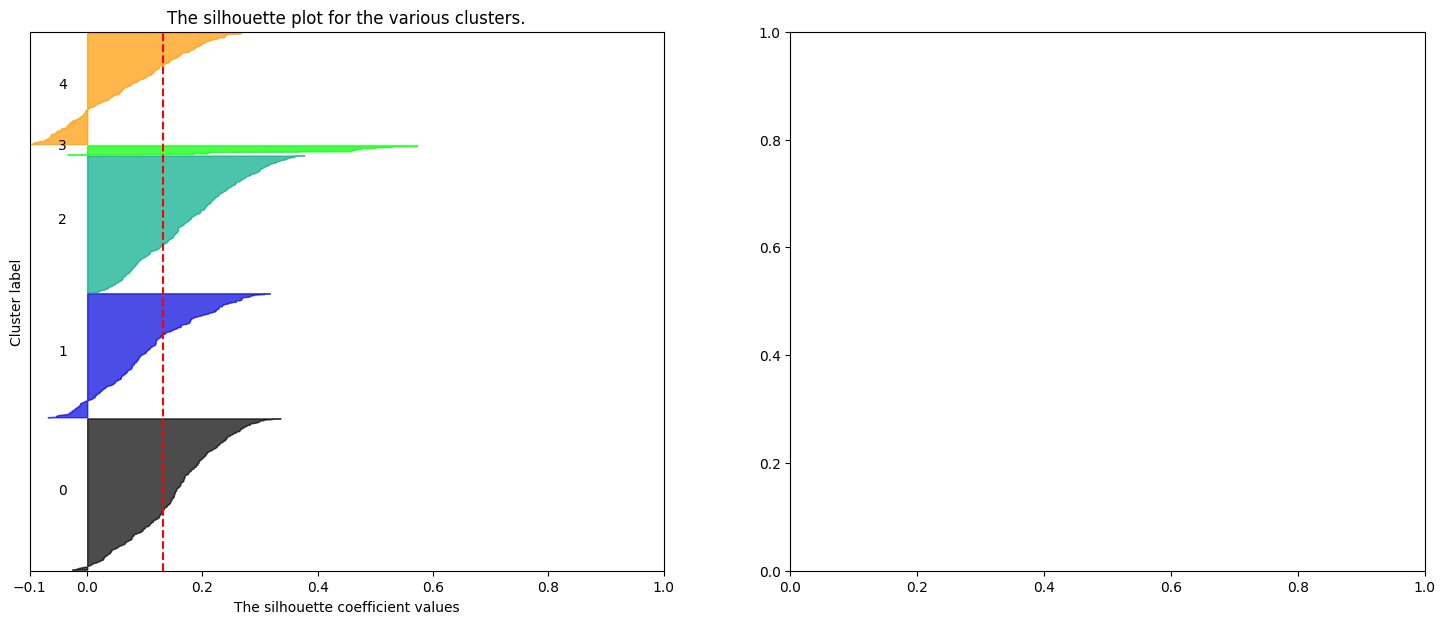

For n_clusters = 6 The average silhouette_score is : 0.1283448739052902


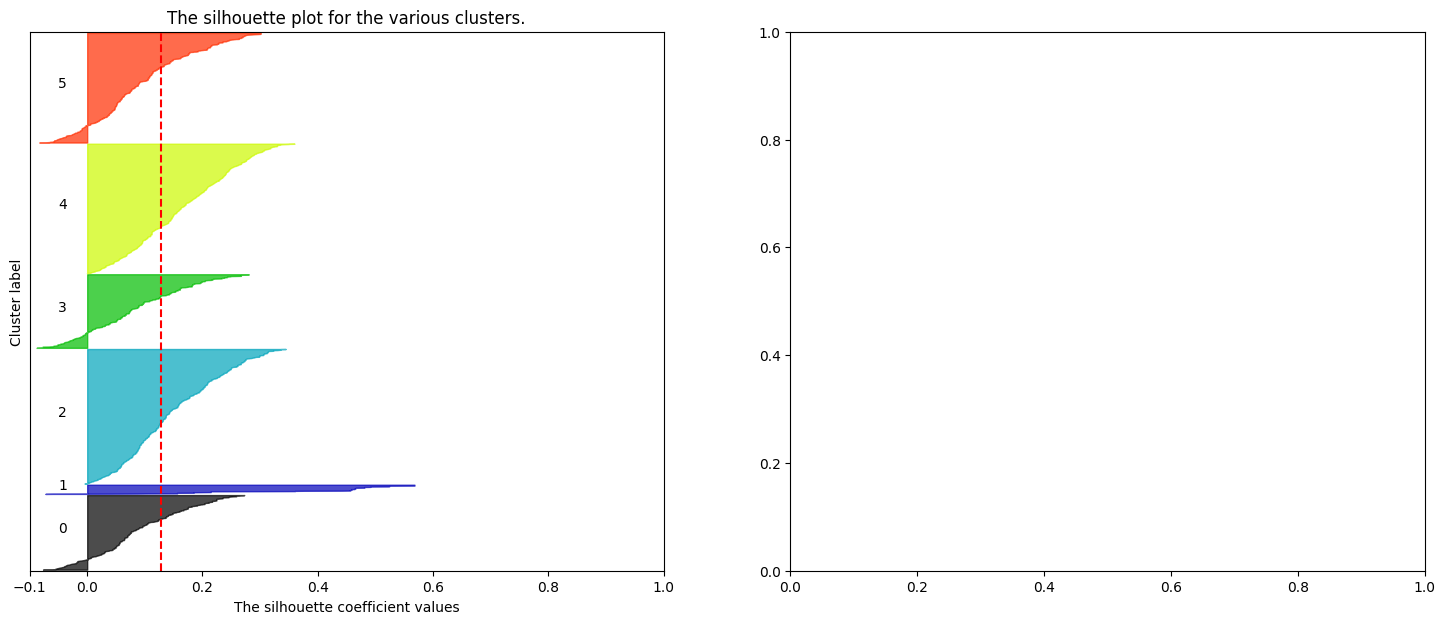

For n_clusters = 7 The average silhouette_score is : 0.12443319577585998


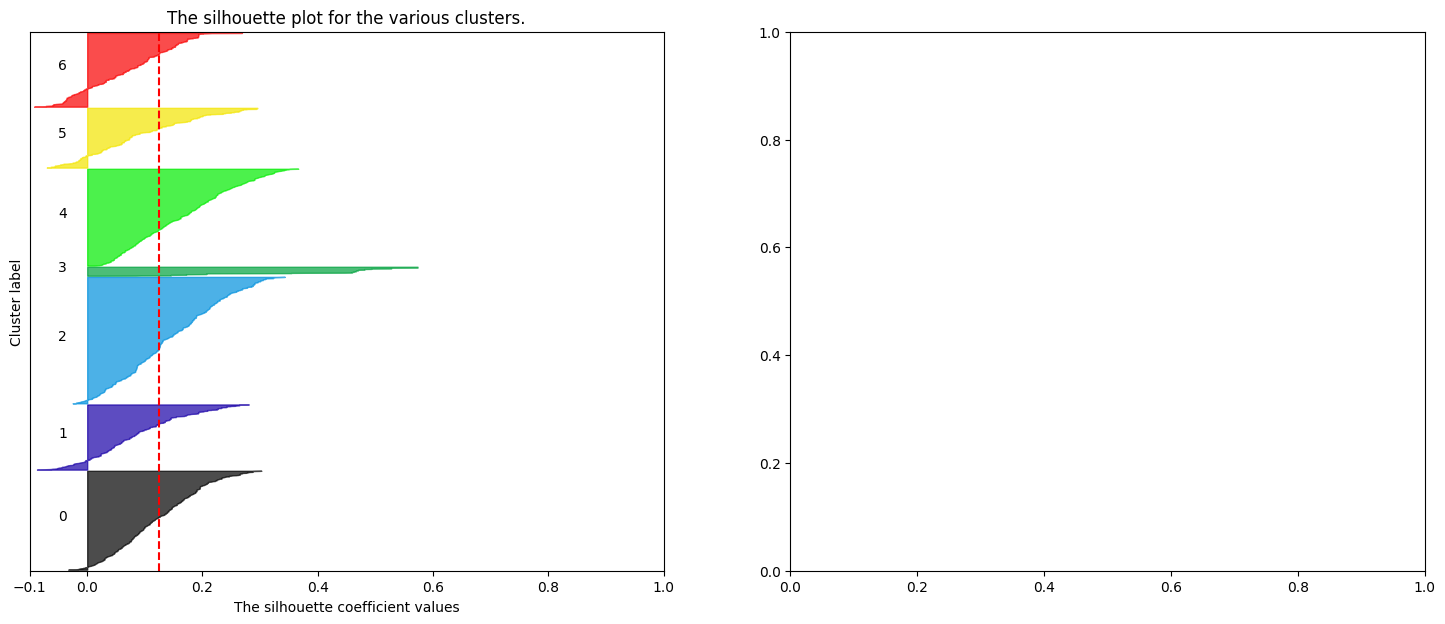

For n_clusters = 8 The average silhouette_score is : 0.12417062334556149


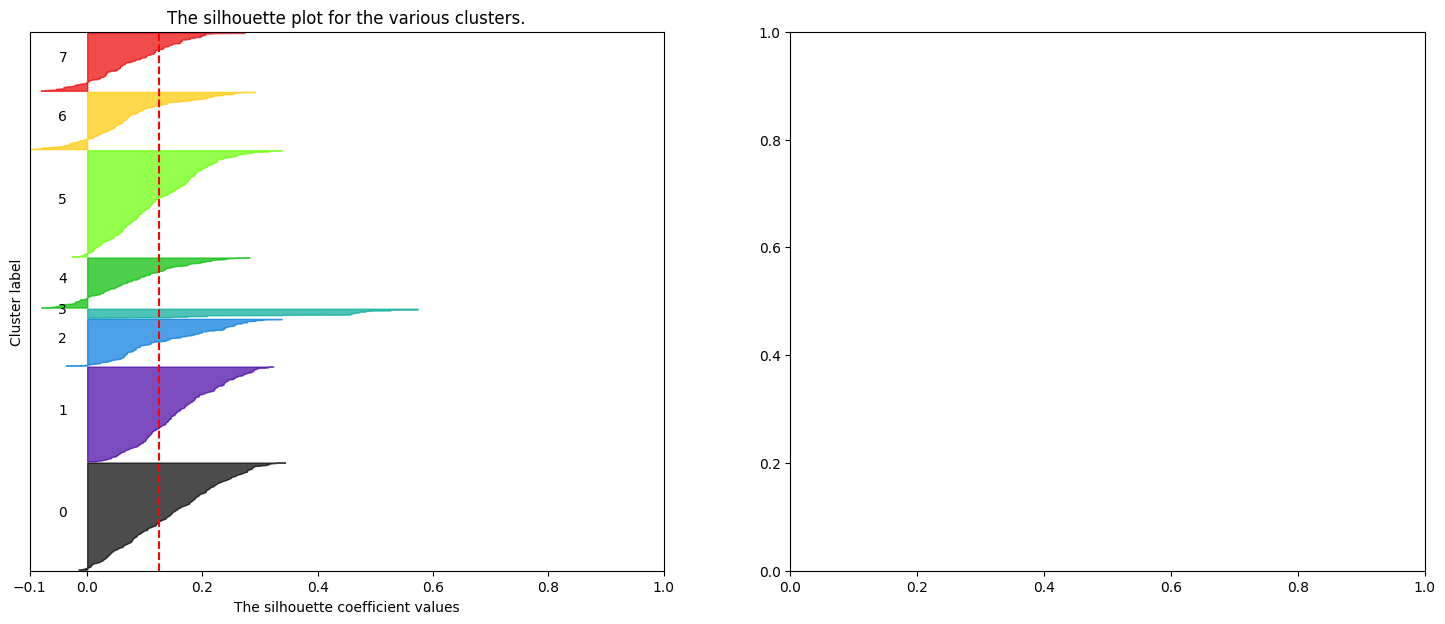

For n_clusters = 9 The average silhouette_score is : 0.12360939723483177


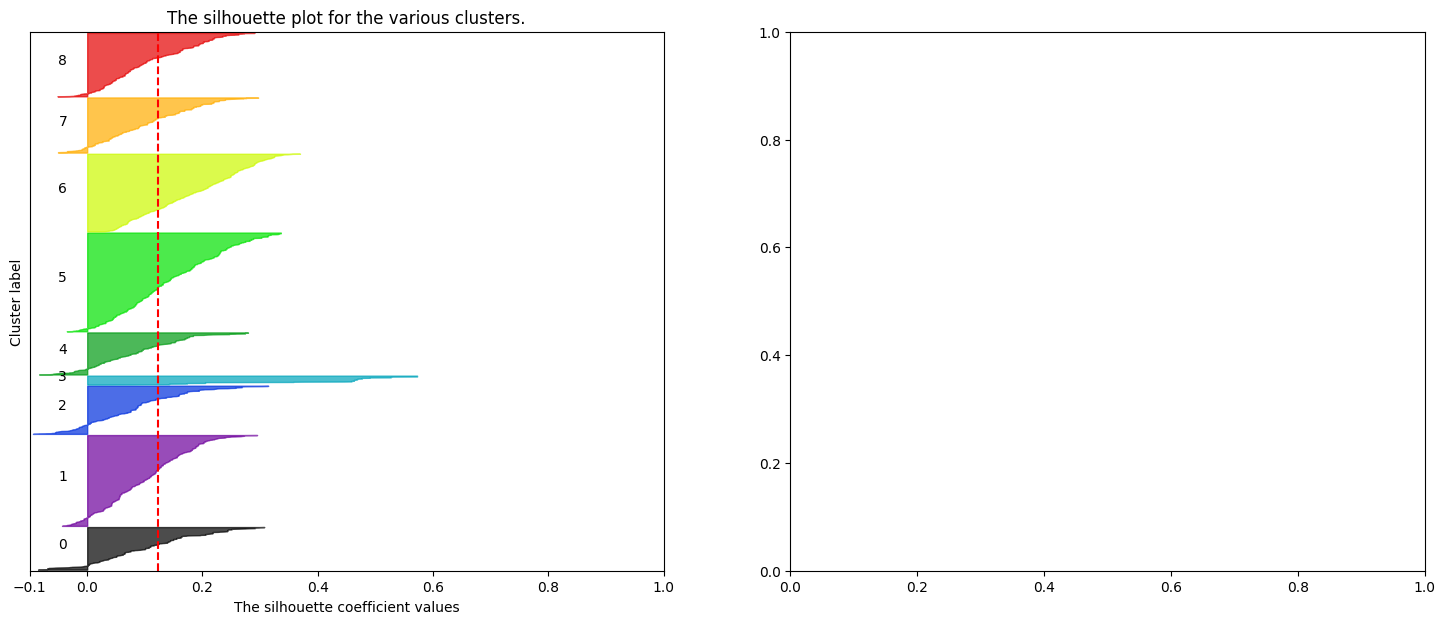

In [18]:
for i in range(2,10):
    silhouette_analysis(i,42, fhc.X_train)

For n_clusters = 2 The average silhouette_score is : 0.29221593535288537


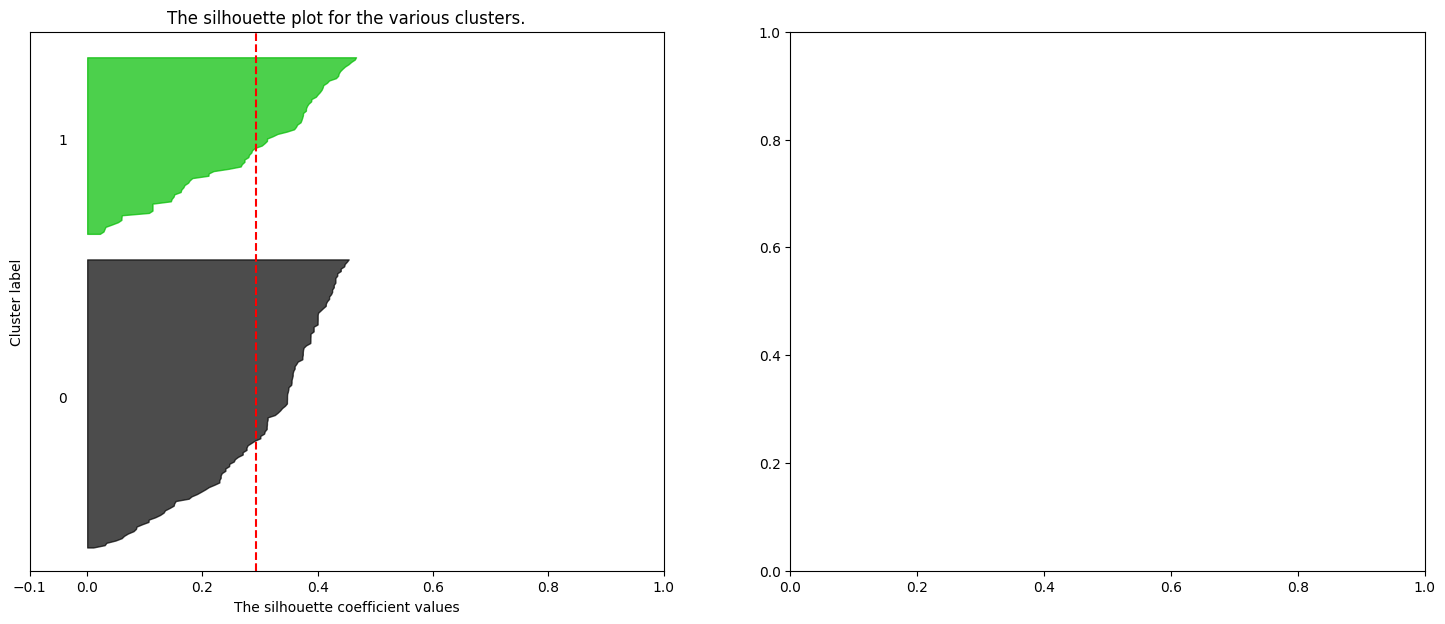

For n_clusters = 3 The average silhouette_score is : 0.20940941326346152


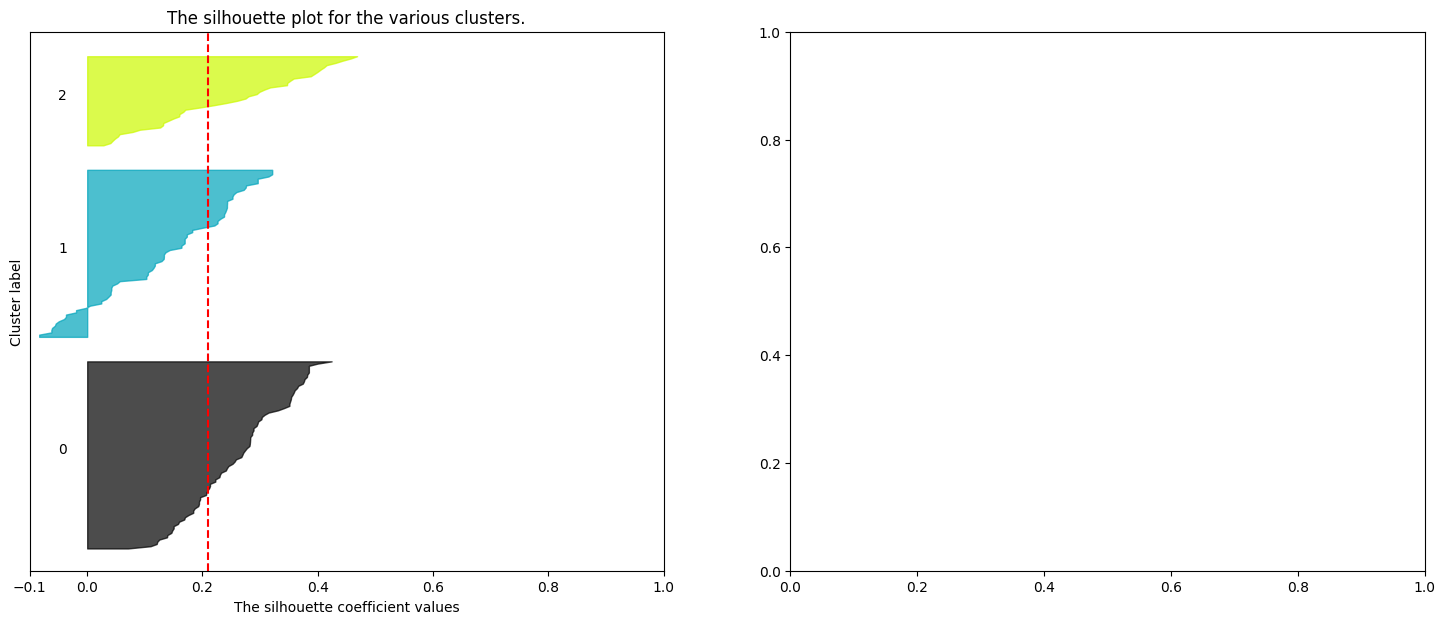

For n_clusters = 4 The average silhouette_score is : 0.21383430543798504


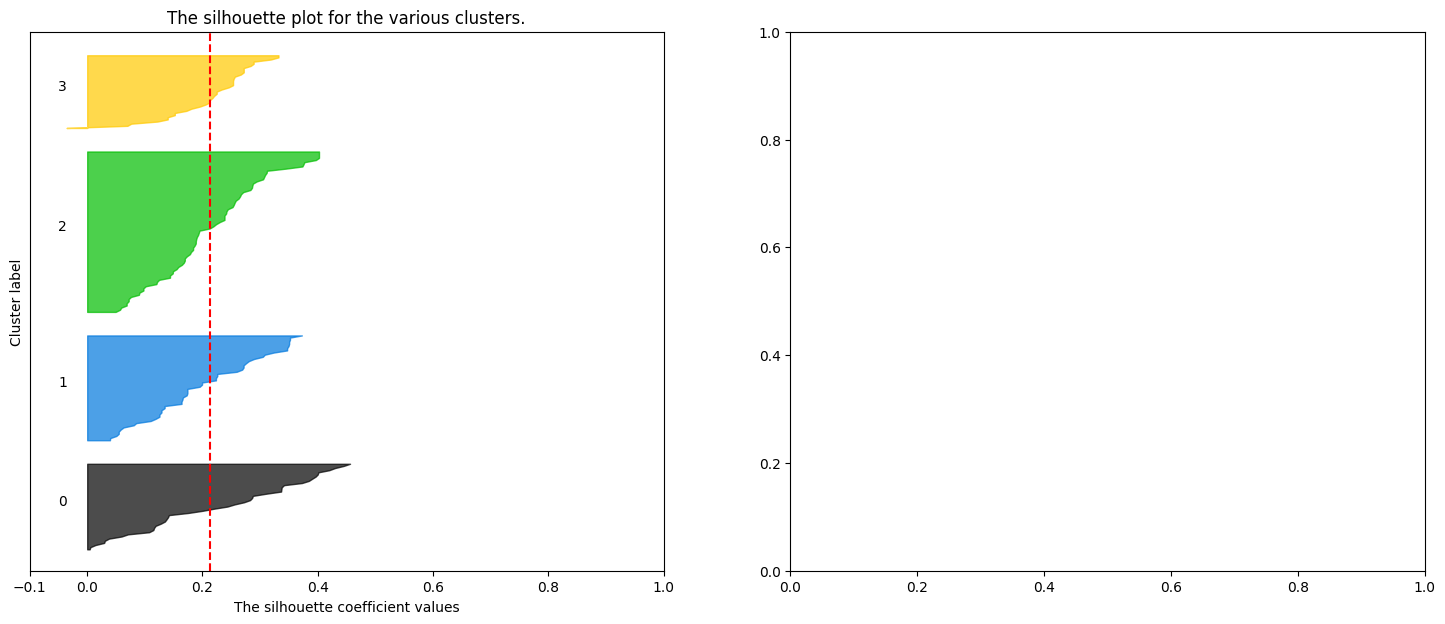

For n_clusters = 5 The average silhouette_score is : 0.19275487491990434


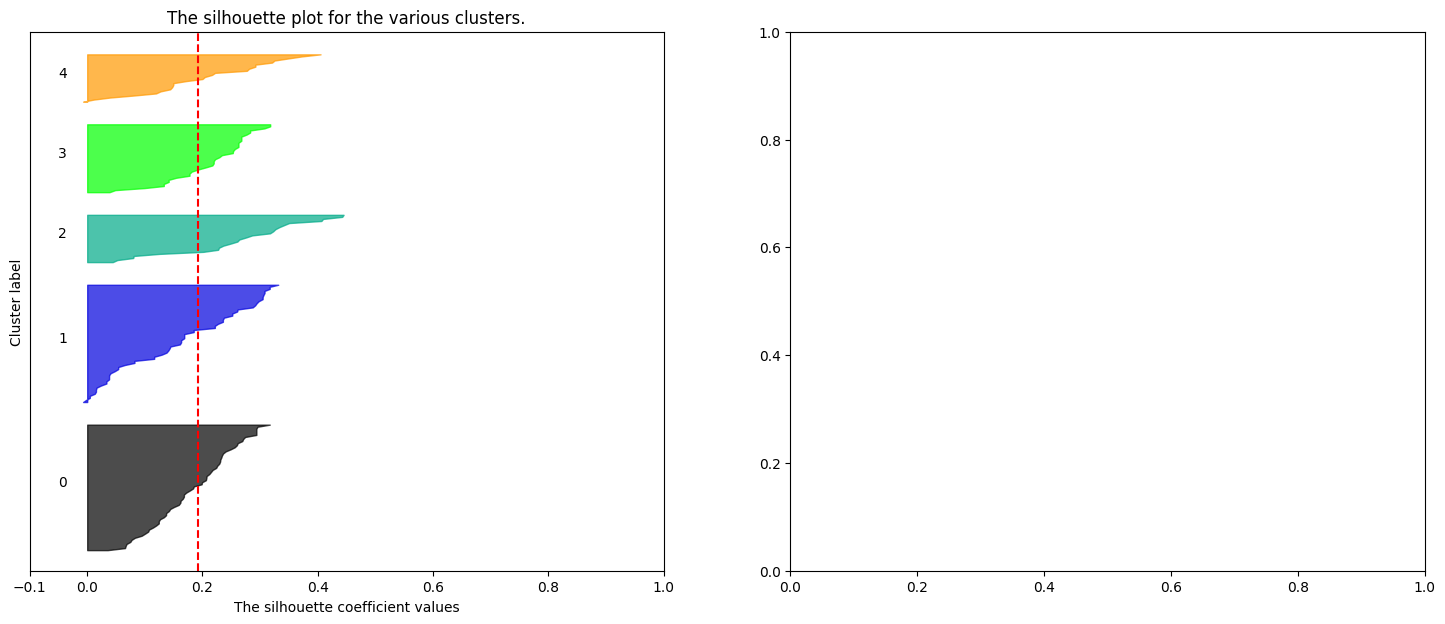

For n_clusters = 6 The average silhouette_score is : 0.19663845195537777


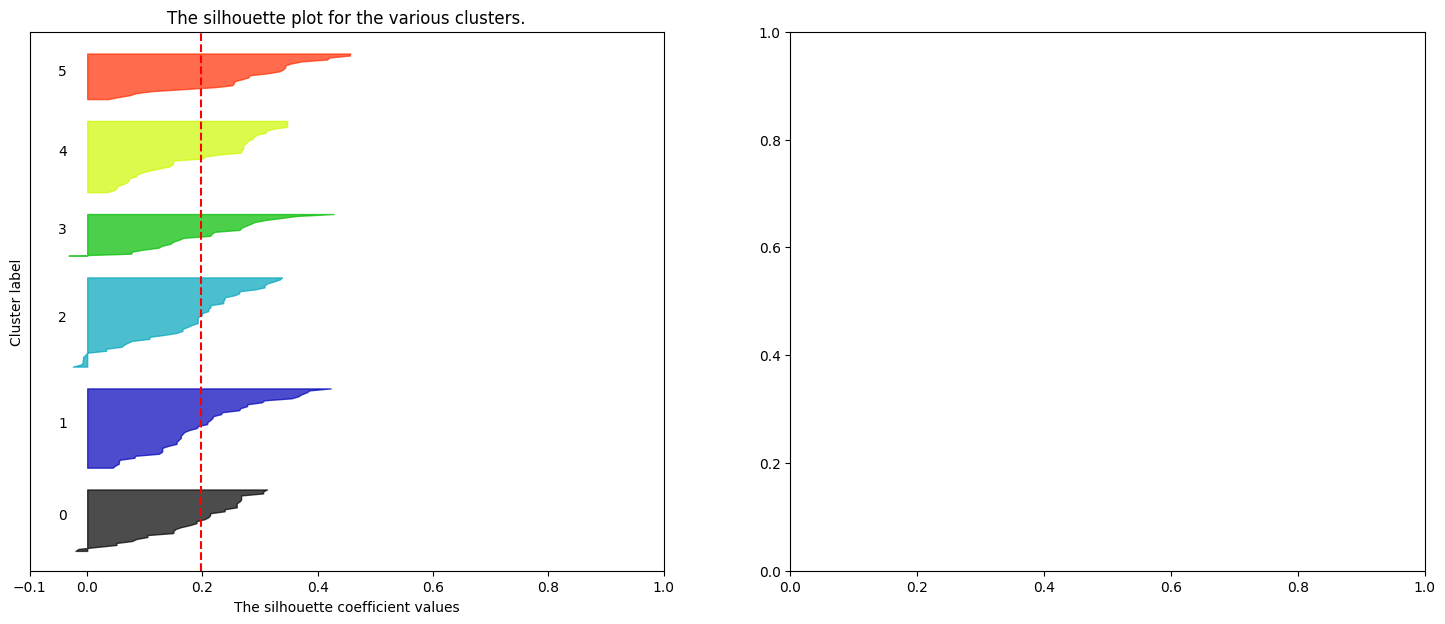

For n_clusters = 7 The average silhouette_score is : 0.20507692651510862


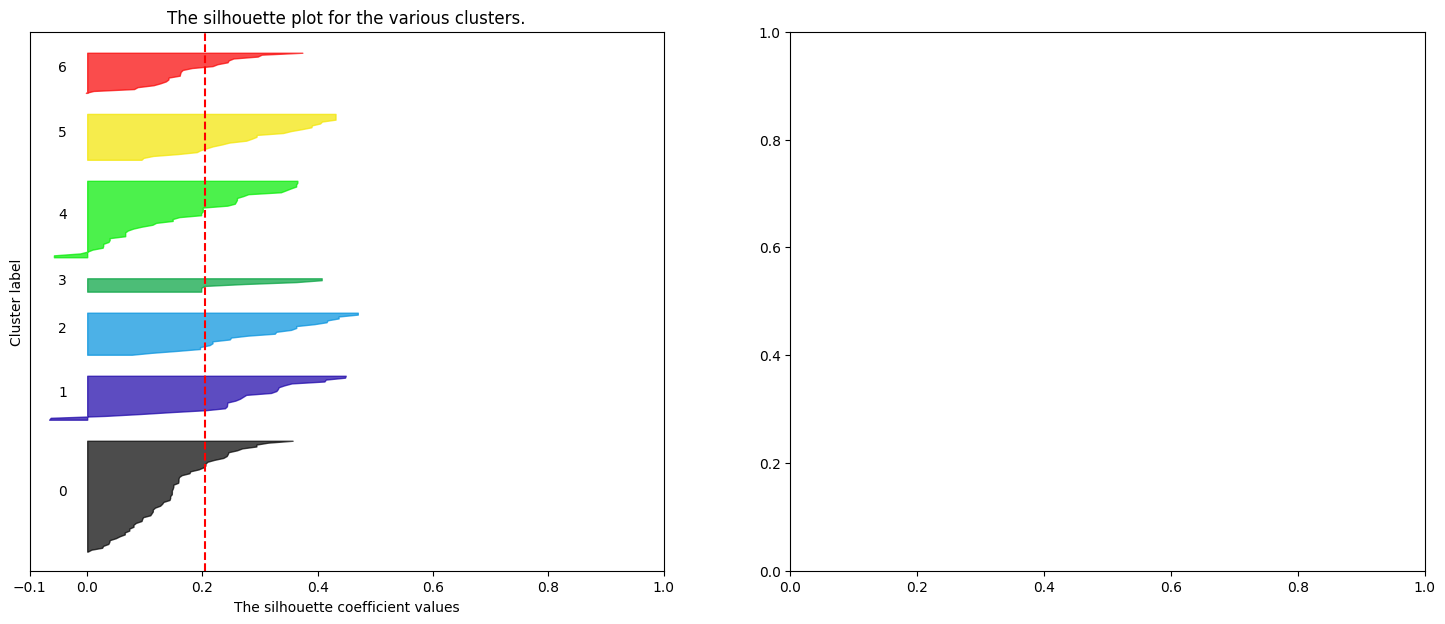

For n_clusters = 8 The average silhouette_score is : 0.20196340898973686


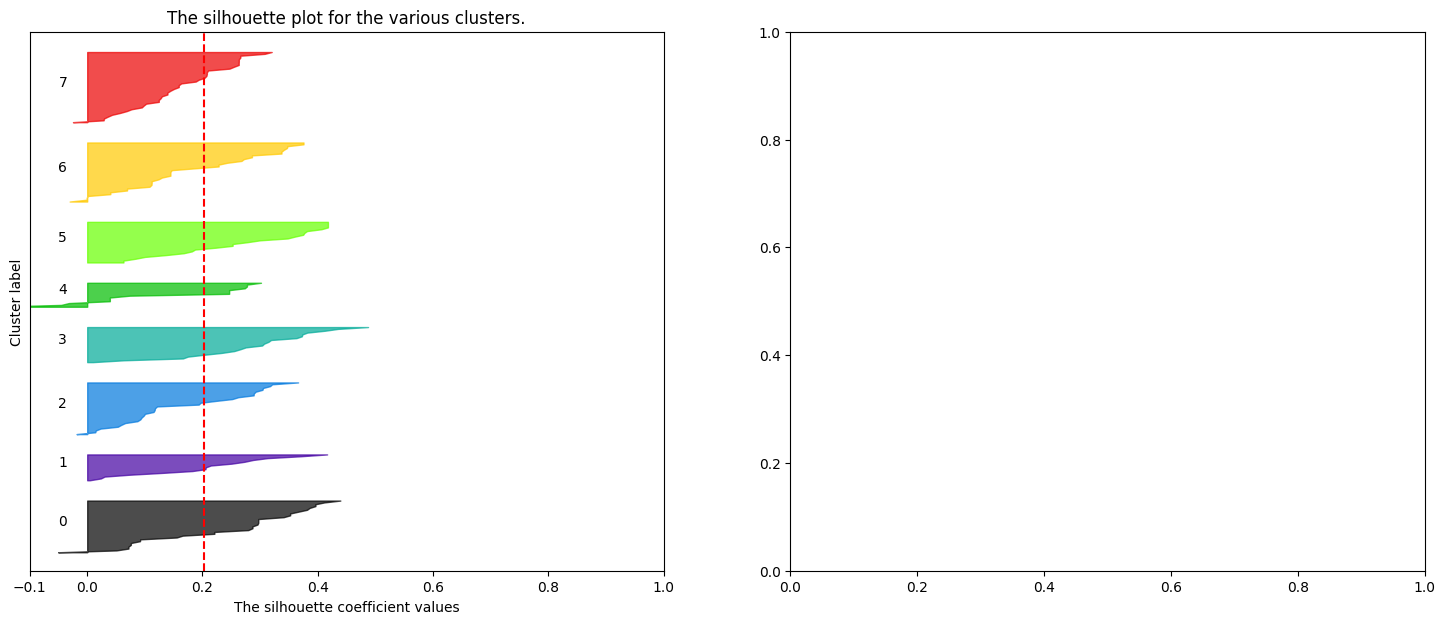

For n_clusters = 9 The average silhouette_score is : 0.21055461020782076


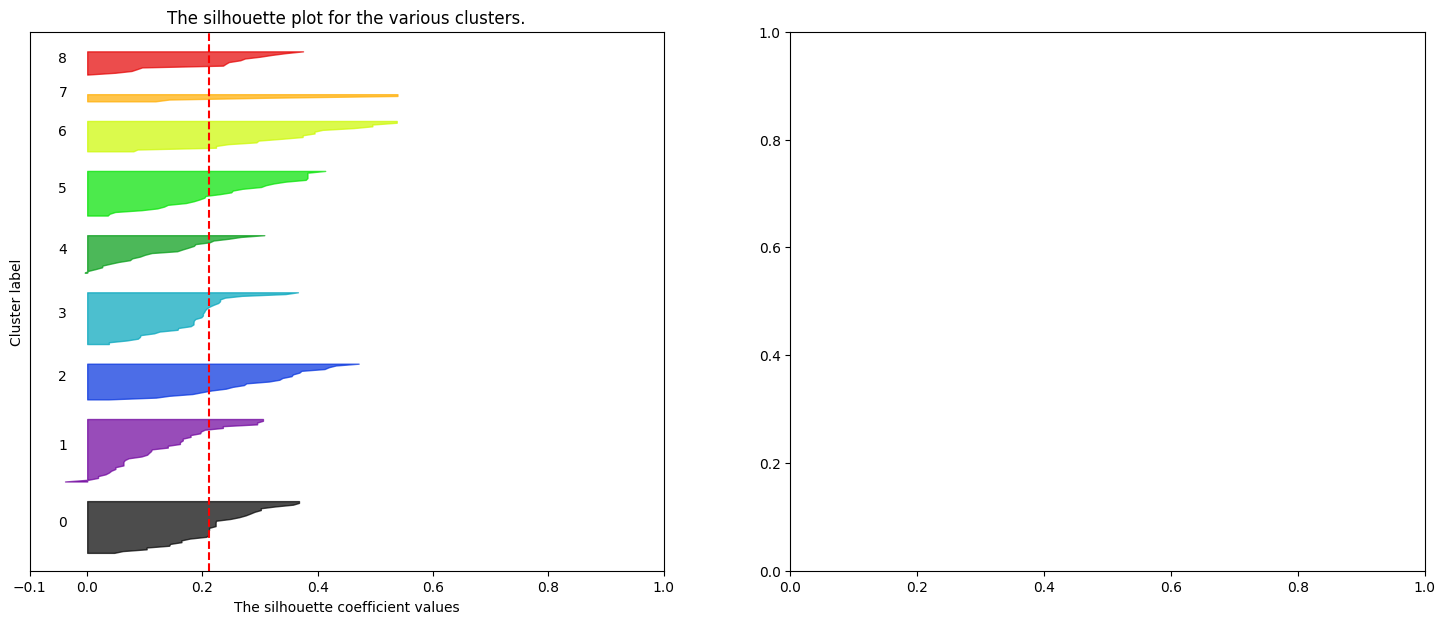

In [19]:
for i in range(2,10):
    silhouette_analysis(i,42, fire.X_train)